In [ ]:
import pandas as pd
import numpy as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DM_Baocao/merged_data.csv')
# df = pd.read_csv('')
# df = pd.read_csv('')

In [ ]:
df.head()

,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Stroke,Asthma,SkinCancer,Diabetic,BMI,AlcoholDrinking,Race,AgeCategory,HeartDisease,KidneyDisease,Smoking,DiffWalking
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
1,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
2,Female,Excellent,0.0,0.0,No,6.0,No,No,Yes,No,26.57,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
3,Female,Very good,2.0,3.0,Yes,5.0,No,No,Yes,No,25.61,No,"White only, Non-Hispanic",Age 55 to 59,No,No,Never smoked,No
4,Female,Excellent,0.0,0.0,Yes,7.0,No,Yes,No,No,23.30,No,"White only, Non-Hispanic",NaN,No,No,Current smoker - now smokes some days,No


In [ ]:
df.shape

(764927, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764927 entries, 0 to 764926
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               764927 non-null  object 
 1   GenHealth         763729 non-null  object 
 2   PhysicalHealth    754000 non-null  float64
 3   MentalHealth      755860 non-null  float64
 4   PhysicalActivity  763834 non-null  object 
 5   SleepTime         759474 non-null  float64
 6   Stroke            763370 non-null  object 
 7   Asthma            763154 non-null  object 
 8   SkinCancer        761784 non-null  object 
 9   Diabetic          763840 non-null  object 
 10  BMI               716121 non-null  float64
 11  AlcoholDrinking   718353 non-null  object 
 12  Race              750870 non-null  object 
 13  AgeCategory       755848 non-null  object 
 14  HeartDisease      761862 non-null  object 
 15  KidneyDisease     763001 non-null  object 
 16  Smoking           72

# Data cleaning

In [ ]:
missing_data = (df.isna().sum() / len(df)) * 100
print(missing_data)

Sex                 0.000000
GenHealth           0.156616
PhysicalHealth      1.428502
MentalHealth        1.185342
PhysicalActivity    0.142889
SleepTime           0.712878
Stroke              0.203549
Asthma              0.231787
SkinCancer          0.410889
Diabetic            0.142105
BMI                 6.380478
AlcoholDrinking     6.088686
Race                1.837692
AgeCategory         1.186911
HeartDisease        0.400692
KidneyDisease       0.251789
Smoking             4.635998
DiffWalking         3.139123
dtype: float64


In [ ]:
df_clean=df.dropna()

In [ ]:
df_clean.isnull().sum()

Sex                 0
GenHealth           0
PhysicalHealth      0
MentalHealth        0
PhysicalActivity    0
SleepTime           0
Stroke              0
Asthma              0
SkinCancer          0
Diabetic            0
BMI                 0
AlcoholDrinking     0
Race                0
AgeCategory         0
HeartDisease        0
KidneyDisease       0
Smoking             0
DiffWalking         0
dtype: int64

In [ ]:
df_clean.duplicated().sum()

28215

In [ ]:
df_clean.drop_duplicates(inplace=True)

In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
print(df.shape)
print(df_clean.shape)

(764927, 18)
(626719, 18)


In [ ]:
df_clean

,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Stroke,Asthma,SkinCancer,Diabetic,BMI,AlcoholDrinking,Race,AgeCategory,HeartDisease,KidneyDisease,Smoking,DiffWalking
2,Female,Excellent,0.0,0.0,No,6.0,No,No,Yes,No,26.57,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
3,Female,Very good,2.0,3.0,Yes,5.0,No,No,Yes,No,25.61,No,"White only, Non-Hispanic",Age 55 to 59,No,No,Never smoked,No
5,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,No,21.77,Yes,"White only, Non-Hispanic",Age 40 to 44,No,No,Never smoked,No
6,Male,Poor,1.0,0.0,No,7.0,Yes,No,No,Yes,26.08,No,"White only, Non-Hispanic",Age 80 or older,Yes,No,Never smoked,No
7,Female,Very good,0.0,0.0,Yes,7.0,No,No,No,No,22.96,Yes,"Black only, Non-Hispanic",Age 80 or older,No,No,Former smoker,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764922,Male,Fair,7.0,0.0,No,6.0,No,Yes,No,Yes,27.41,No,Hispanic,60-64,Yes,No,Yes,Yes
764923,Male,Very good,0.0,0.0,Yes,5.0,No,Yes,No,No,29.84,No,Hispanic,35-39,No,No,Yes,No
764924,Female,Good,0.0,0.0,Yes,6.0,No,No,No,No,24.24,No,Hispanic,45-49,No,No,No,No
764925,Female,Good,0.0,0.0,No,12.0,No,No,No,No,32.81,No,Hispanic,25-29,No,No,No,No


In [ ]:
df_clean.describe(include='object').T


,count,unique,top,freq
Sex,626719,2,Female,327512
GenHealth,626719,5,Very good,216345
PhysicalActivity,626719,2,Yes,479969
Stroke,626719,2,No,600775
Asthma,626719,2,No,533883
SkinCancer,626719,2,No,569844
Diabetic,626719,6,No,521320
AlcoholDrinking,626719,2,No,428773
Race,626719,10,"White only, Non-Hispanic",243997
AgeCategory,626719,26,Age 65 to 69,35076


In [ ]:
for col in df_clean.describe(include='object').columns:
    print('Column Name: ',col)
    print(df_clean[col].value_counts())
    print('*'*60 )

Column Name:  Sex
Sex
Female    327512
Male      299207
Name: count, dtype: int64
************************************************************
Column Name:  GenHealth
GenHealth
Very good    216345
Good         196508
Excellent    111841
Fair          77366
Poor          24659
Name: count, dtype: int64
************************************************************
Column Name:  PhysicalActivity
PhysicalActivity
Yes    479969
No     146750
Name: count, dtype: int64
************************************************************
Column Name:  Stroke
Stroke
No     600775
Yes     25944
Name: count, dtype: int64
************************************************************
Column Name:  Asthma
Asthma
No     533883
Yes     92836
Name: count, dtype: int64
************************************************************
Column Name:  SkinCancer
SkinCancer
No     569844
Yes     56875
Name: count, dtype: int64
************************************************************
Column Name:  Diabetic
Diabetic
No  

In [ ]:
df.AgeCategory.value_counts()

AgeCategory
Age 65 to 69       47099
Age 60 to 64       44511
Age 70 to 74       43472
Age 55 to 59       36821
Age 80 or older    36251
65-69              34151
60-64              33686
Age 50 to 54       33644
Age 75 to 79       32518
70-74              31065
Age 40 to 44       29942
55-59              29757
Age 45 to 49       28531
Age 35 to 39       28526
Age 18 to 24       26941
Age 30 to 34       25807
50-54              25382
80 or older        24153
Age 25 to 29       21990
45-49              21791
75-79              21482
18-24              21064
40-44              21006
35-39              20550
30-34              18753
25-29              16955
Name: count, dtype: int64

In [ ]:
df_clean['AgeCategory'] = df_clean['AgeCategory'].str.replace(' to ', '-')
df_clean['AgeCategory'] = df_clean['AgeCategory'].str.replace('Age ', '')
df_clean['AgeCategory'].value_counts()

AgeCategory
65-69          66746
60-64          64175
70-74          61816
55-59          55080
50-54          48923
80 or older    48788
75-79          44884
40-44          42456
45-49          41970
35-39          40944
18-24          40706
30-34          37140
25-29          33091
Name: count, dtype: int64

# Exploratory Data Analysis and Data preprocessing

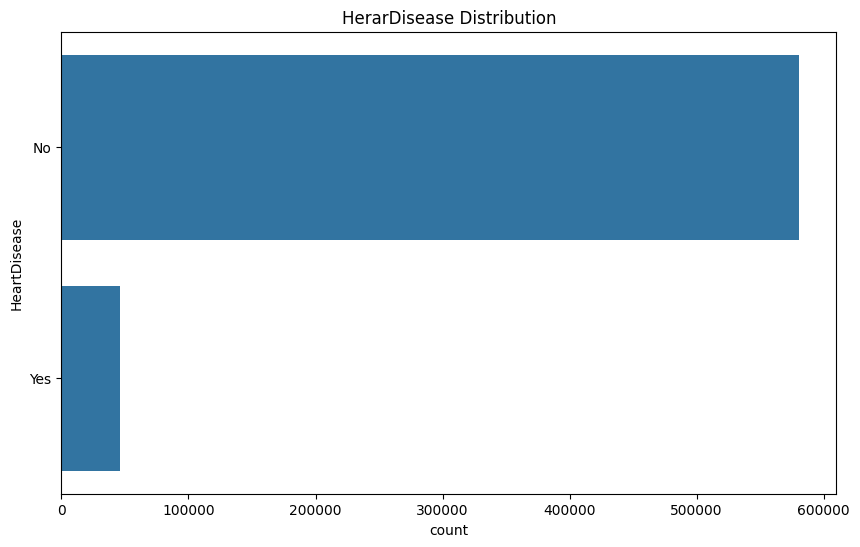

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df_clean['HeartDisease'])
plt.title('HerarDisease Distribution')
plt.show()

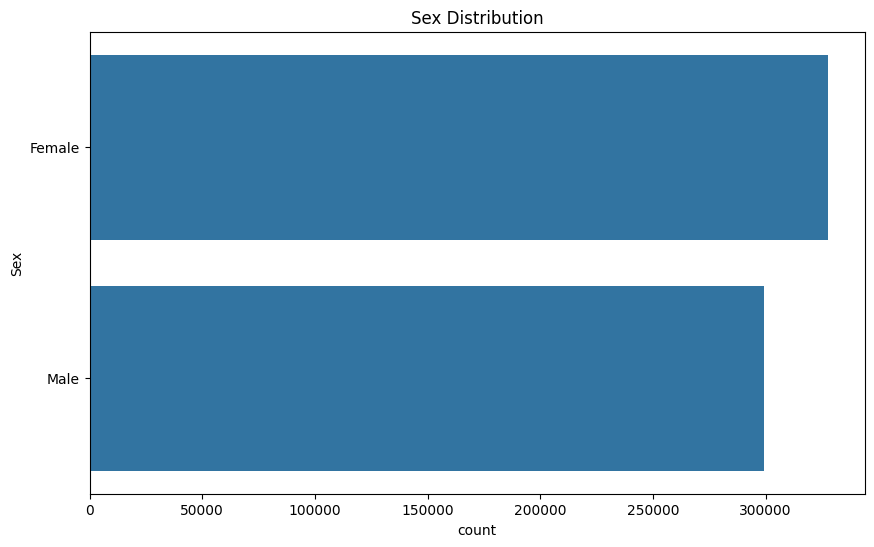

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df_clean['Sex'])
plt.title('Sex Distribution')
plt.show()

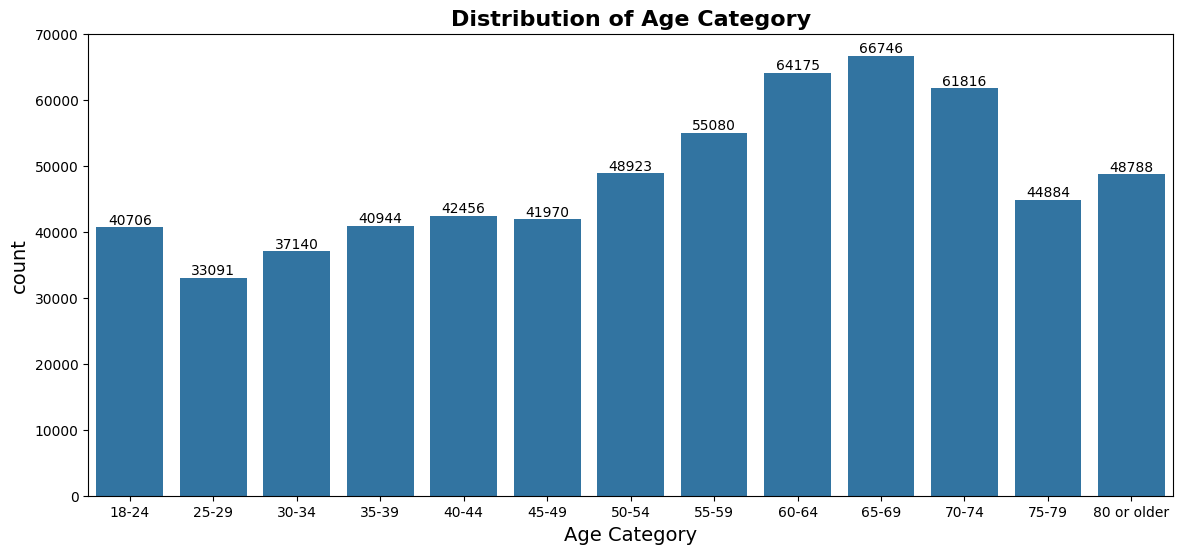

In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df_clean, x='AgeCategory',
                   order = df_clean['AgeCategory'].value_counts().sort_index().index.values)

ax.set_title('Distribution of Age Category', fontsize=16, weight='bold')
ax.set_xlabel('Age Category', fontsize=14)
ax.set_ylabel('count', fontsize=14)

for c in ax.containers:
    ax.bar_label(c)

plt.show()

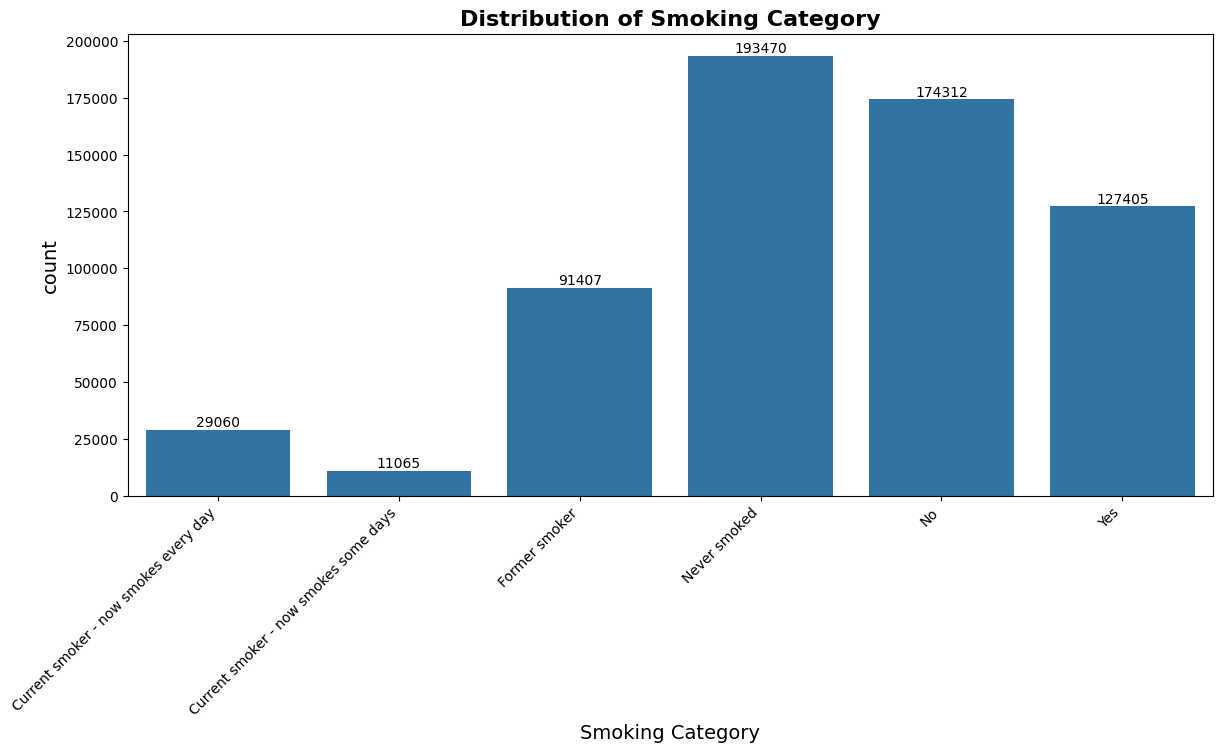

In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df_clean, x='Smoking',
                   order = df_clean['Smoking'].value_counts().sort_index().index.values)

ax.set_title('Distribution of Smoking Category', fontsize=16, weight='bold')
ax.set_xlabel('Smoking Category', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_ylabel('count', fontsize=14)

for c in ax.containers:
    ax.bar_label(c)

plt.show()

In [ ]:
replacements = {
    'Never smoked': 'No',
}

df_clean['Smoking'].replace(replacements, inplace=True)

In [ ]:
df_clean['Smoking'].value_counts()

Smoking
No                                       367782
Yes                                      127405
Former smoker                             91407
Current smoker - now smokes every day     29060
Current smoker - now smokes some days     11065
Name: count, dtype: int64

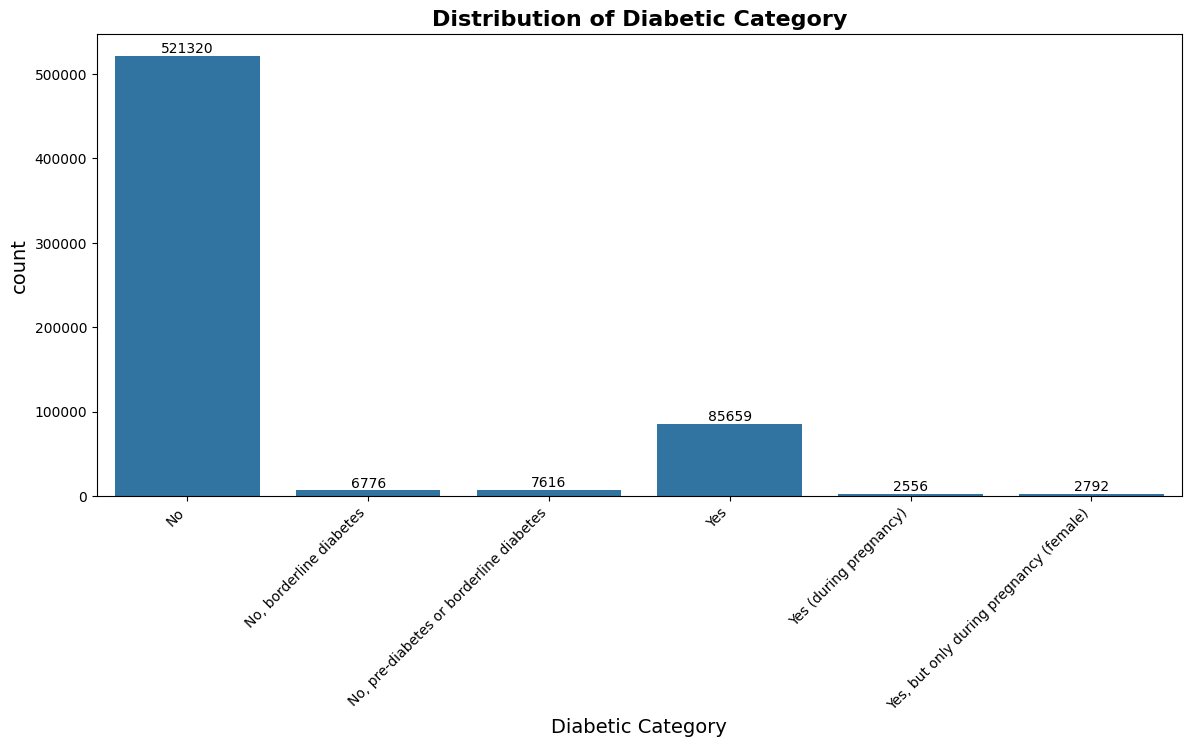

In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df_clean, x='Diabetic',
                   order = df_clean['Diabetic'].value_counts().sort_index().index.values)

ax.set_title('Distribution of Diabetic Category', fontsize=16, weight='bold')
ax.set_xlabel('Diabetic Category', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_ylabel('count', fontsize=14)

for c in ax.containers:
    ax.bar_label(c)

plt.show()

In [ ]:
df_clean['Diabetic'].value_counts()

Diabetic
No                                         521320
Yes                                         85659
No, pre-diabetes or borderline diabetes      7616
No, borderline diabetes                      6776
Yes, but only during pregnancy (female)      2792
Yes (during pregnancy)                       2556
Name: count, dtype: int64

In [ ]:
replacements = {
    'No, pre-diabetes or borderline diabetes':'No, borderline diabetes',
    'Yes, but only during pregnancy (female)':'Yes (during pregnancy)'
}

df_clean['Diabetic'].replace(replacements, inplace=True)

In [ ]:
df_clean['Diabetic'].value_counts()

Diabetic
No                         521320
Yes                         85659
No, borderline diabetes     14392
Yes (during pregnancy)       5348
Name: count, dtype: int64

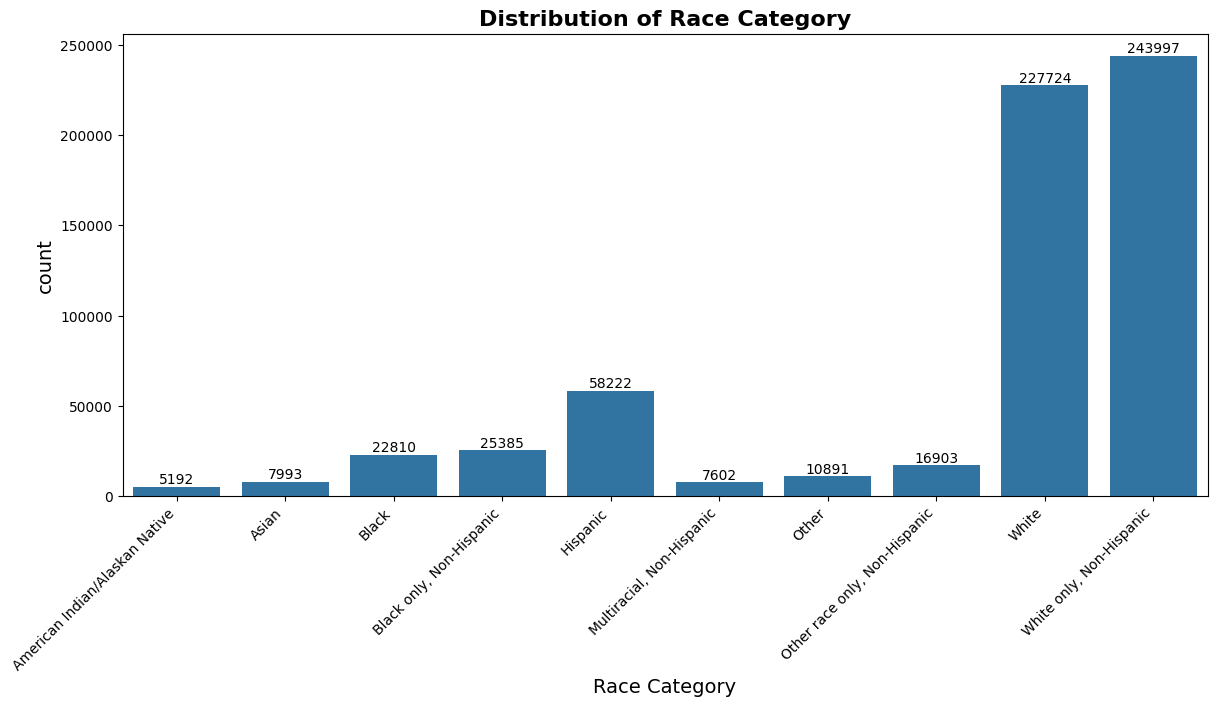

In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df_clean, x='Race',
                   order = df_clean['Race'].value_counts().sort_index().index.values)

ax.set_title('Distribution of Race Category', fontsize=16, weight='bold')
ax.set_xlabel('Race Category', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_ylabel('count', fontsize=14)

for c in ax.containers:
    ax.bar_label(c)

plt.show()

In [ ]:
replacements = {
    'White only, Non-Hispanic': 'White',
    'Black only, Non-Hispanic': 'Black',
    'Other race only, Non-Hispanic':'Other'
}

df_clean['Race'].replace(replacements, inplace=True)

In [ ]:
df_clean['Race'].value_counts()

Race
White                             471721
Hispanic                           58222
Black                              48195
Other                              27794
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: count, dtype: int64

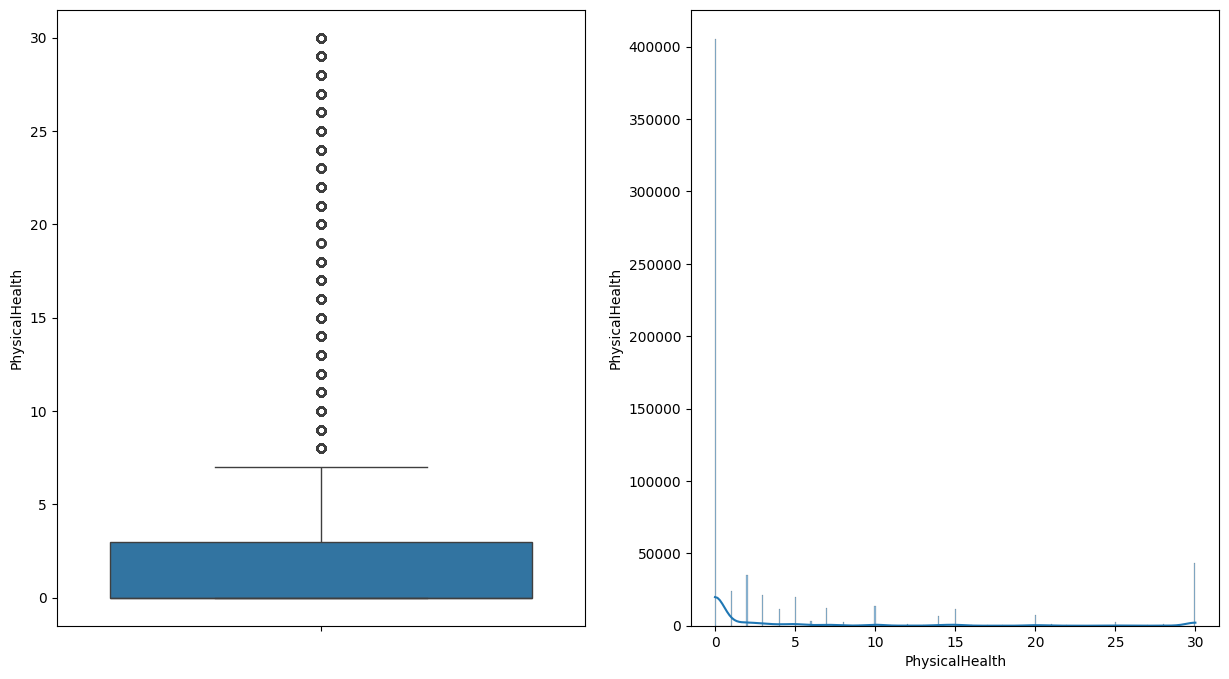

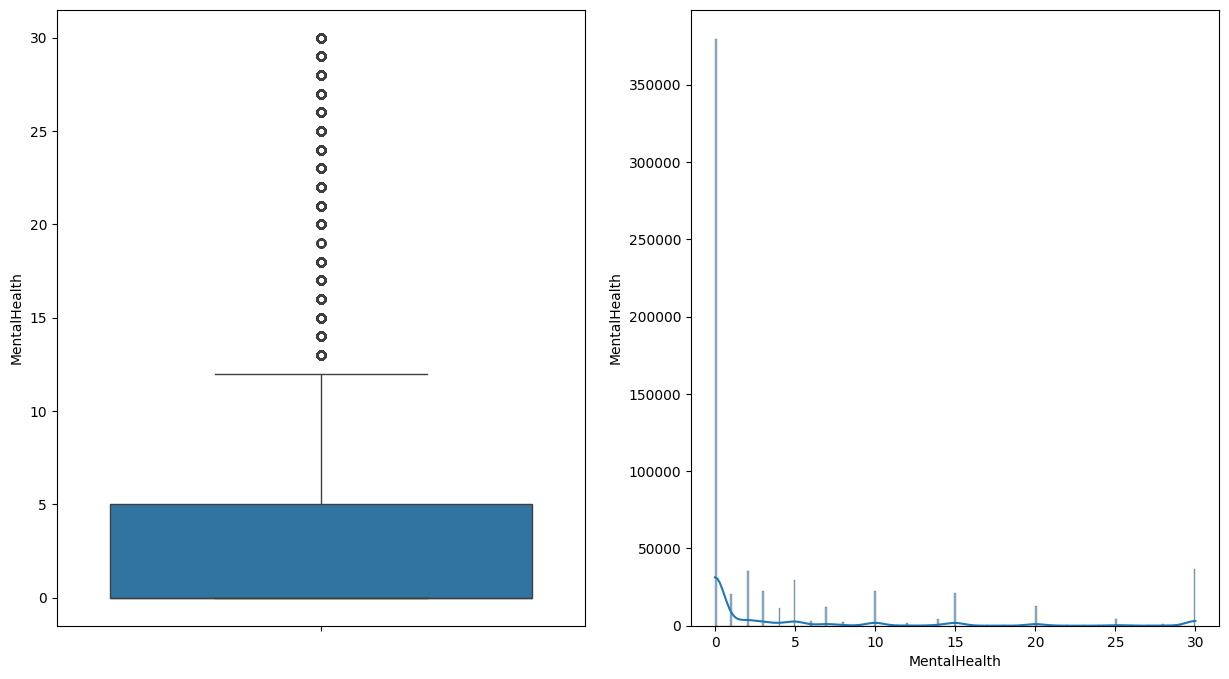

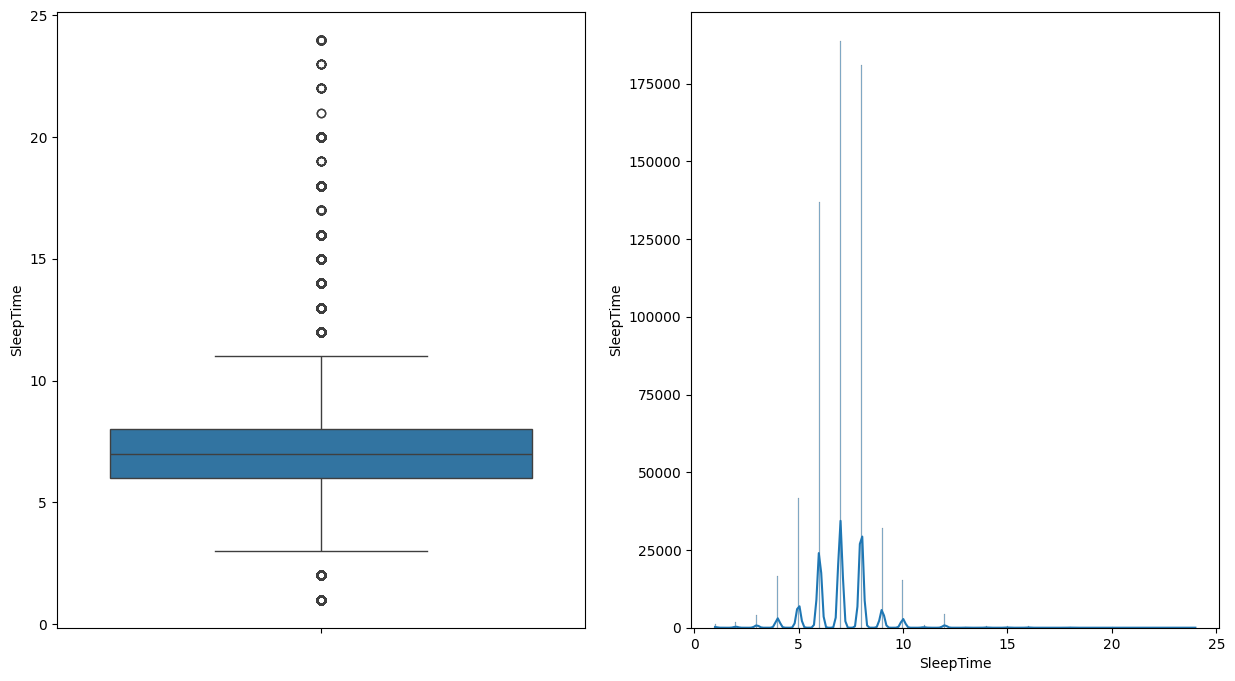

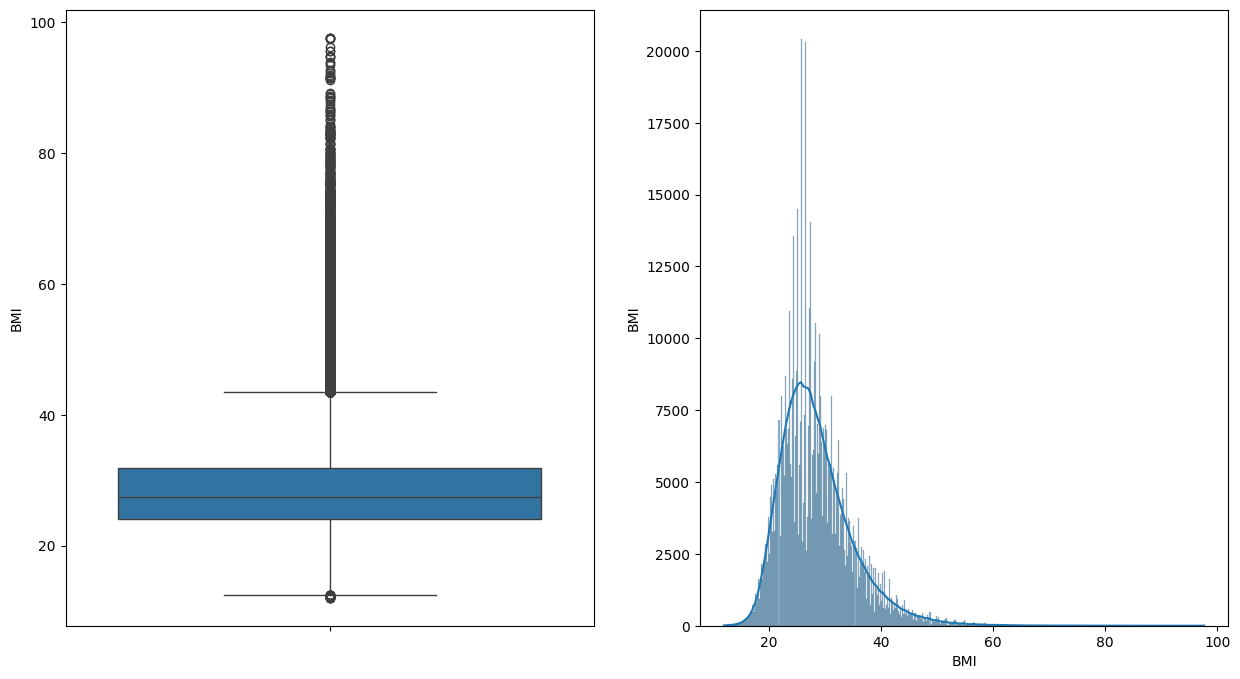

In [ ]:
numerical_columns = df_clean.select_dtypes('number').columns

for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_clean[col])
    plt.ylabel(col)

    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[col], kde=True)
    plt.ylabel(col)

    plt.show()


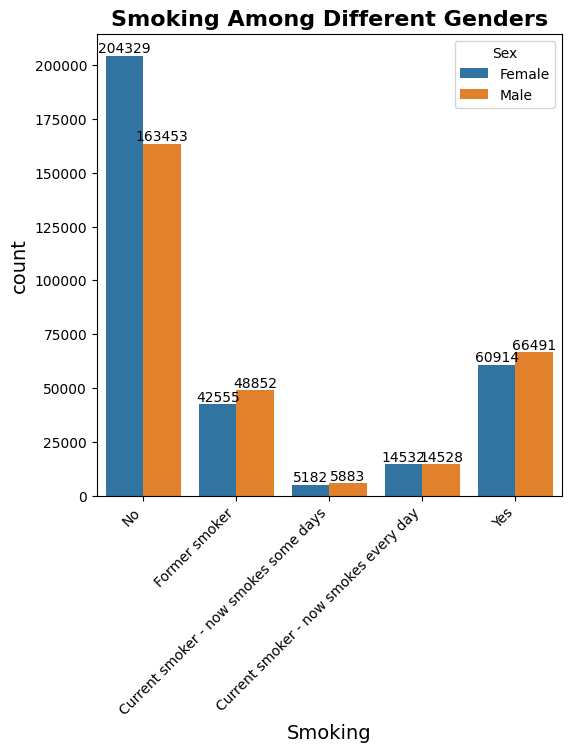

In [ ]:
plt.figure(figsize=(6, 6))

ax = sns.countplot(data=df_clean, x='Smoking', hue='Sex')


ax.set_title("Smoking Among Different Genders", fontsize=16,  weight='bold')
ax.set_xlabel("Smoking", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_ylabel("count", fontsize=14)

for c in ax.containers:
    ax.bar_label(c)

plt.show()

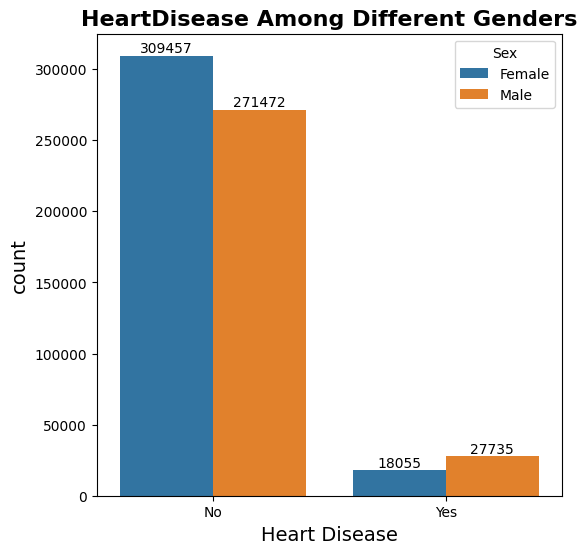

In [ ]:
plt.figure(figsize=(6, 6))

ax = sns.countplot(data=df_clean, x='HeartDisease', hue='Sex')


ax.set_title("HeartDisease Among Different Genders", fontsize=16,  weight='bold')
ax.set_xlabel("Heart Disease", fontsize=14)
ax.set_ylabel("count", fontsize=14)

for c in ax.containers:
    ax.bar_label(c)

plt.show()

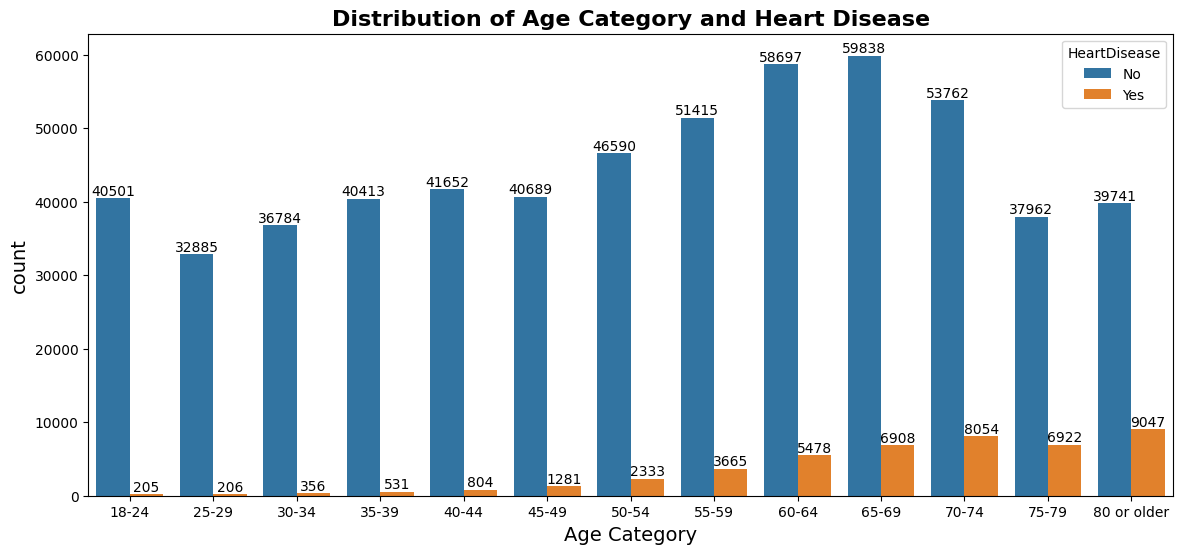

In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df_clean, x='AgeCategory', hue='HeartDisease',
                   order = df_clean['AgeCategory'].value_counts().sort_index().index.values)

ax.set_title('Distribution of Age Category and Heart Disease', fontsize=16, weight='bold')
ax.set_xlabel('Age Category', fontsize=14)
ax.set_ylabel('count', fontsize=14)

for c in ax.containers:
    ax.bar_label(c)

plt.show()


In [ ]:
def remove_outliers(df_clean, columns):
  for col in columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
  return df_clean

df_clean = remove_outliers(df_clean, numerical_columns)
print(df.shape)
print(df_clean.shape)


(764927, 18)
(440864, 18)


In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealth,440864.0,0.664577,1.531481,0.00,0.00,0.00,0.00,7.00
MentalHealth,440864.0,0.857010,1.725071,0.00,0.00,0.00,1.00,7.00
SleepTime,440864.0,7.121471,1.146841,3.00,6.00,7.00,8.00,11.00
BMI,440864.0,27.633857,5.111311,13.24,23.89,27.12,30.85,42.07


In [ ]:
df_clean.describe(include='object').T

,count,unique,top,freq
Sex,440864,2,Male,223044
GenHealth,440864,5,Very good,175043
PhysicalActivity,440864,2,Yes,358307
Stroke,440864,2,No,427087
Asthma,440864,2,No,388353
SkinCancer,440864,2,No,399247
Diabetic,440864,4,No,377387
AlcoholDrinking,440864,2,No,298541
Race,440864,7,White,334271
AgeCategory,440864,13,65-69,48734


In [ ]:
cat_col = df_clean.select_dtypes('object').columns


In [ ]:
for i in cat_col:
    print(i)
    print(len(df_clean[i].unique()))
    print('*'*60)

Sex
2
************************************************************
GenHealth
5
************************************************************
PhysicalActivity
2
************************************************************
Stroke
2
************************************************************
Asthma
2
************************************************************
SkinCancer
2
************************************************************
Diabetic
4
************************************************************
AlcoholDrinking
2
************************************************************
Race
7
************************************************************
AgeCategory
13
************************************************************
HeartDisease
2
************************************************************
KidneyDisease
2
************************************************************
Smoking
5
************************************************************
DiffWalking
2
*********************************

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.encoding = {
            'Sex': {'Female': 0, 'Male': 1},
            'GenHealth': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4},
            'PhysicalActivity': {'No': 0, 'Yes': 1},
            'Stroke': {'No': 0, 'Yes': 1},
            'Asthma': {'No': 0, 'Yes': 1},
            'SkinCancer': {'No': 0, 'Yes': 1},
            'Diabetic': {'No': 0, 'No, borderline diabetes': 1, 'Yes (during pregnancy)': 2, 'Yes': 3},
            'AlcoholDrinking': {'No': 0, 'Yes': 1},
            'Race': {'White': 0, 'Hispanic': 1, 'Black': 2, 'Other': 3, 'Asian': 4,
                    'Multiracial, Non-Hispanic': 5, 'American Indian/Alaskan Native': 6},
            'AgeCategory': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
                            '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10,
                            '75-79': 11, '80 or older': 12},
            'KidneyDisease': {'No': 0, 'Yes': 1},
            'Smoking': {'No': 0, 'Yes': 1, 'Former smoker': 2, 'Current smoker - now smokes some days': 3,
                        'Current smoker - now smokes every day': 4},
            'DiffWalking': {'No': 0, 'Yes': 1},
            'HeartDisease': {'No': 0, 'Yes': 1}
        }

    def fit(self, X, y=None):
        self.feature_names = X.columns
        return self

    def transform(self, X):
        return X.apply(lambda col: col.map(self.encoding[col.name]).astype(int) if col.name in self.encoding else col)

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

    def get_feature_names_out(self, names=None):
        return self.feature_names

In [ ]:
encoder = OrdinalEncoder()
df_encode = encoder.fit_transform(df_clean)
df_encode

,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Stroke,Asthma,SkinCancer,Diabetic,BMI,AlcoholDrinking,Race,AgeCategory,HeartDisease,KidneyDisease,Smoking,DiffWalking
2,0,4,0.0,0.0,0,6.0,0,0,1,0,26.57,0,0,12,0,0,0,0
3,0,3,2.0,3.0,1,5.0,0,0,1,0,25.61,0,0,7,0,0,0,0
5,0,1,2.0,0.0,1,9.0,0,0,0,0,21.77,1,0,4,0,0,0,0
6,1,0,1.0,0.0,0,7.0,1,0,0,3,26.08,0,0,12,1,0,0,0
7,0,3,0.0,0.0,1,7.0,0,0,0,0,22.96,1,2,12,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764920,0,4,0.0,0.0,1,6.0,0,0,0,0,23.38,0,1,8,0,0,0,0
764921,0,4,0.0,0.0,1,8.0,0,0,0,0,22.22,0,1,0,0,0,0,0
764922,1,1,7.0,0.0,0,6.0,0,1,0,3,27.41,0,1,8,1,0,1,1
764923,1,3,0.0,0.0,1,5.0,0,1,0,0,29.84,0,1,3,0,0,1,0


In [ ]:
heart_disease_col = df_encode.pop('HeartDisease')
df_encode['HeartDisease'] = heart_disease_col
df_encode


,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Stroke,Asthma,SkinCancer,Diabetic,BMI,AlcoholDrinking,Race,AgeCategory,KidneyDisease,Smoking,DiffWalking,HeartDisease
2,0,4,0.0,0.0,0,6.0,0,0,1,0,26.57,0,0,12,0,0,0,0
3,0,3,2.0,3.0,1,5.0,0,0,1,0,25.61,0,0,7,0,0,0,0
5,0,1,2.0,0.0,1,9.0,0,0,0,0,21.77,1,0,4,0,0,0,0
6,1,0,1.0,0.0,0,7.0,1,0,0,3,26.08,0,0,12,0,0,0,1
7,0,3,0.0,0.0,1,7.0,0,0,0,0,22.96,1,2,12,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764920,0,4,0.0,0.0,1,6.0,0,0,0,0,23.38,0,1,8,0,0,0,0
764921,0,4,0.0,0.0,1,8.0,0,0,0,0,22.22,0,1,0,0,0,0,0
764922,1,1,7.0,0.0,0,6.0,0,1,0,3,27.41,0,1,8,0,1,1,1
764923,1,3,0.0,0.0,1,5.0,0,1,0,0,29.84,0,1,3,0,1,0,0


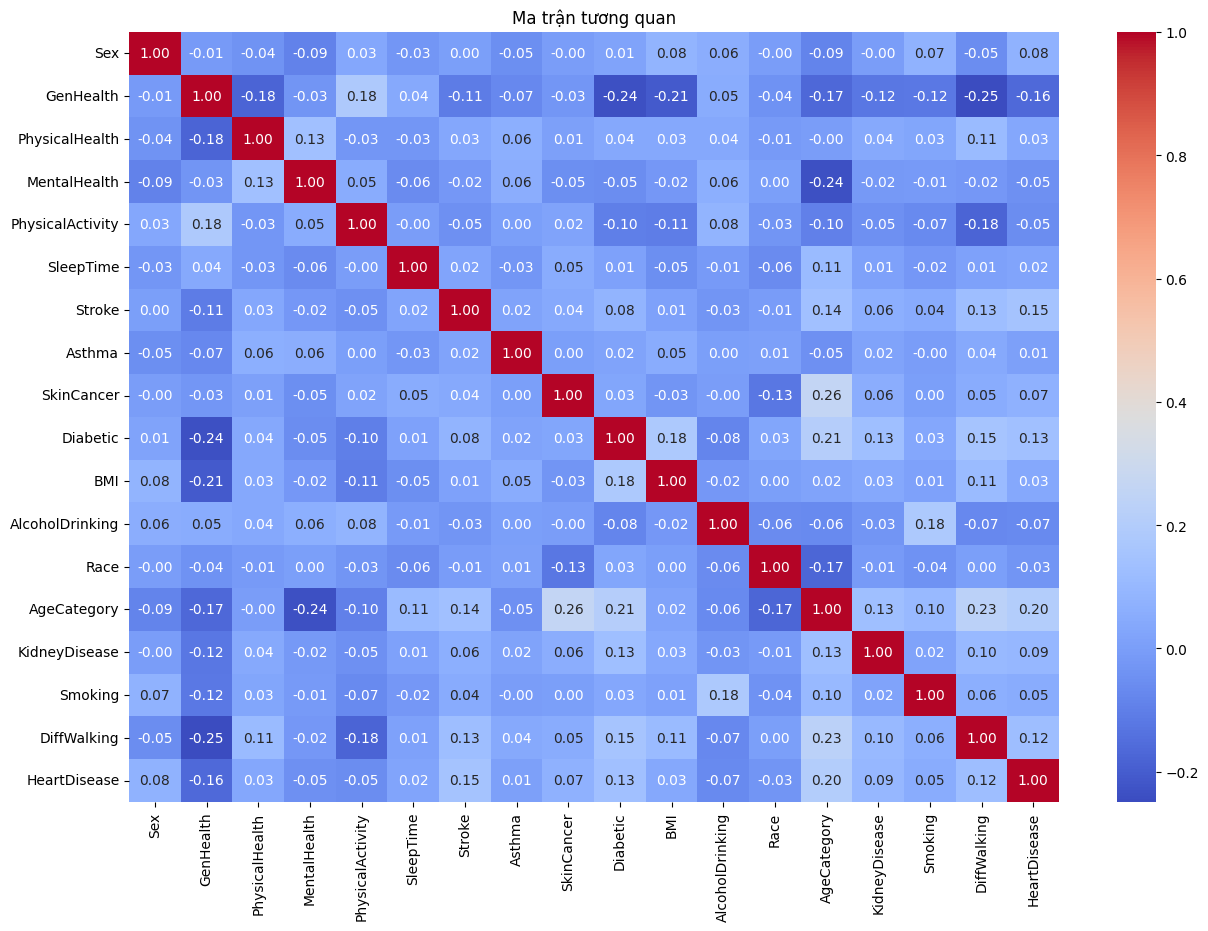

In [ ]:
corr_matrix = df_encode.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()


In [ ]:
X = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

In [ ]:
X.shape

(440864, 17)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Training Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    models = {
        "RandomForest": RandomForestClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "GradientBoosting": GradientBoostingClassifier()
    }
    accuracies = {}
    classification_reports = {}
    confusion_matrices = {}
    # Huấn luyện và đánh giá từng mô hình
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Tính accuracy, classification report,confusion matrix
        accuracies[model_name] = accuracy_score(y_test, y_pred)
        classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=True)
        confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

    return accuracies, classification_reports, confusion_matrices




In [ ]:
accuracies, reports, confusion_matrices = train_models(X, y)

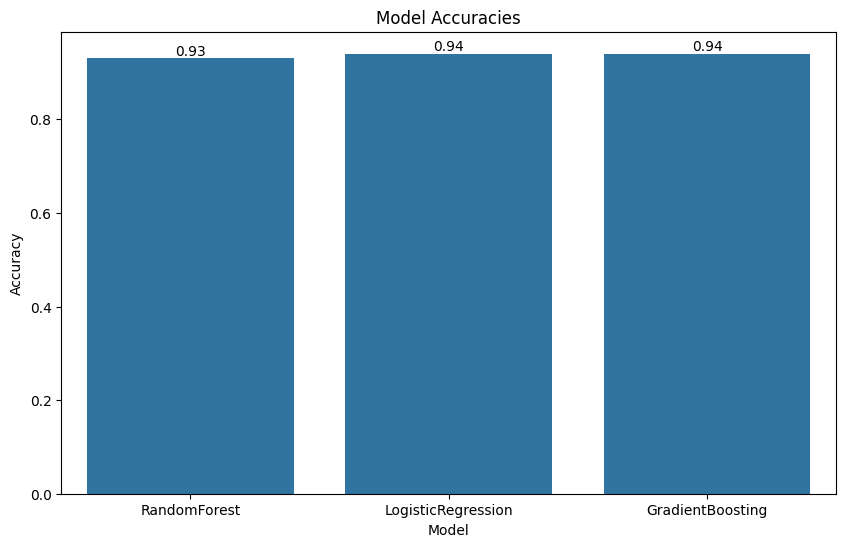

In [ ]:
plt.figure(figsize=(10, 6))
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())
sns.barplot(x=model_names, y=accuracy_values)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, accuracy in enumerate(accuracy_values):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')
plt.show()


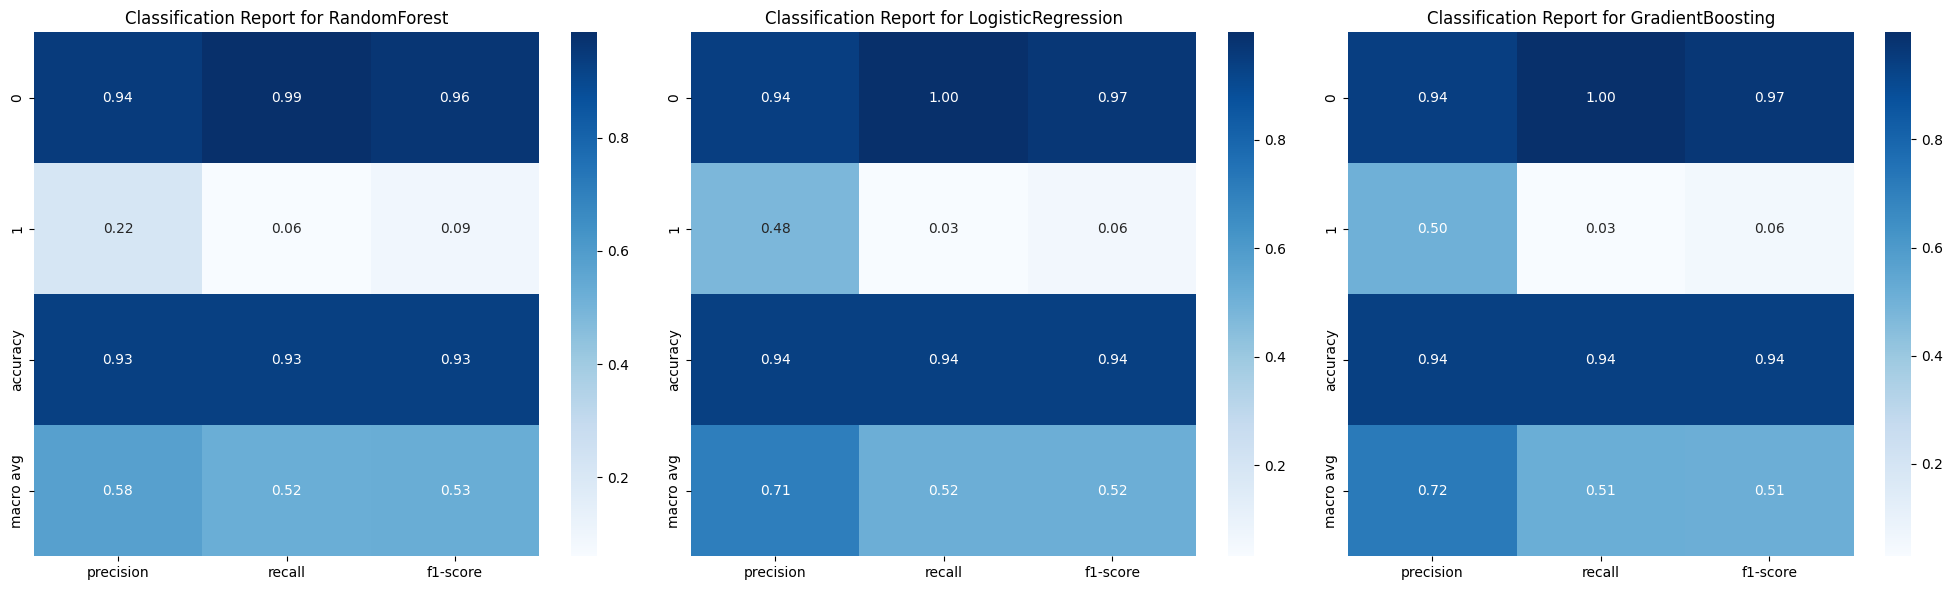

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (model_name, report) in enumerate(reports.items()):
    report_df = pd.DataFrame(report).transpose()
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt='.2f', ax=axes[i])
    axes[i].set_title(f'Classification Report for {model_name}')

plt.tight_layout()
plt.show()


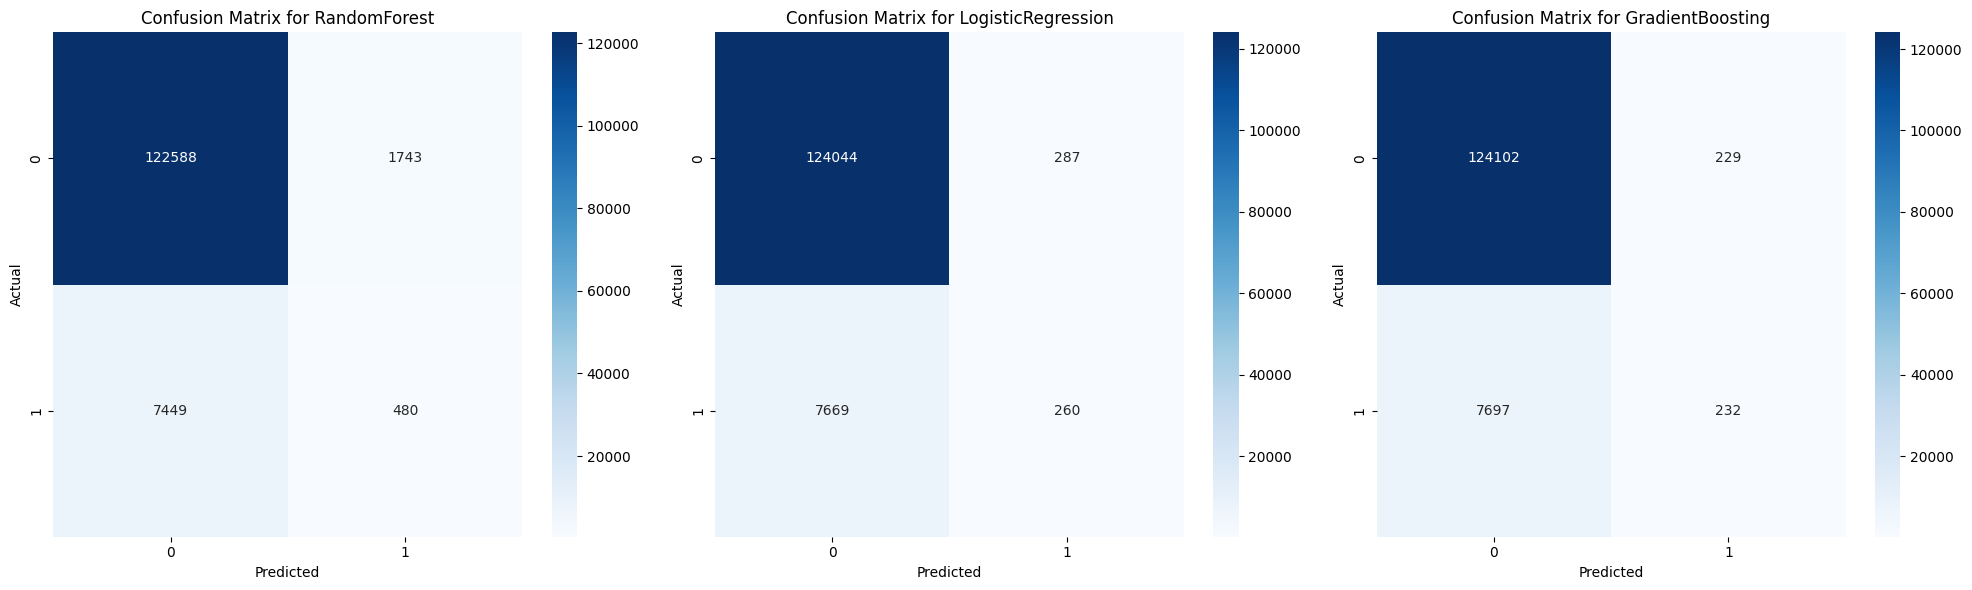

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (model_name, matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)


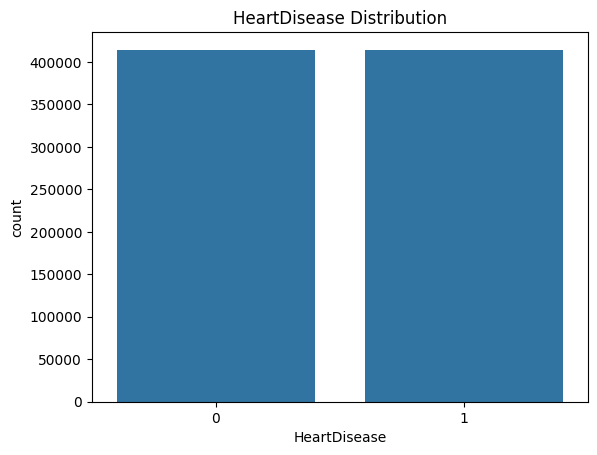

In [ ]:
sns.countplot( x='HeartDisease',data= y_resampled.to_frame())
plt.title('HeartDisease Distribution')
plt.show()

In [ ]:
accuracies, reports, confusion_matrices = train_models(X_resampled, y_resampled)

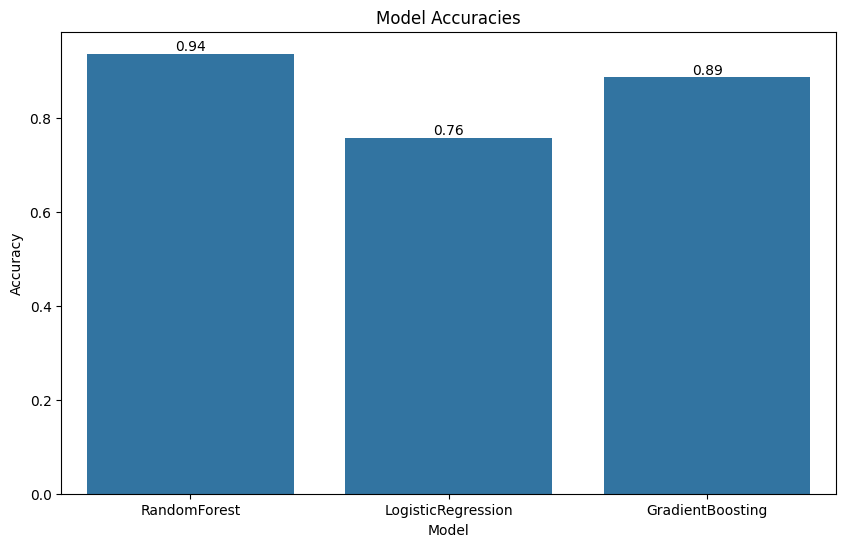

In [ ]:
plt.figure(figsize=(10, 6))
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())
sns.barplot(x=model_names, y=accuracy_values)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, accuracy in enumerate(accuracy_values):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')
plt.show()


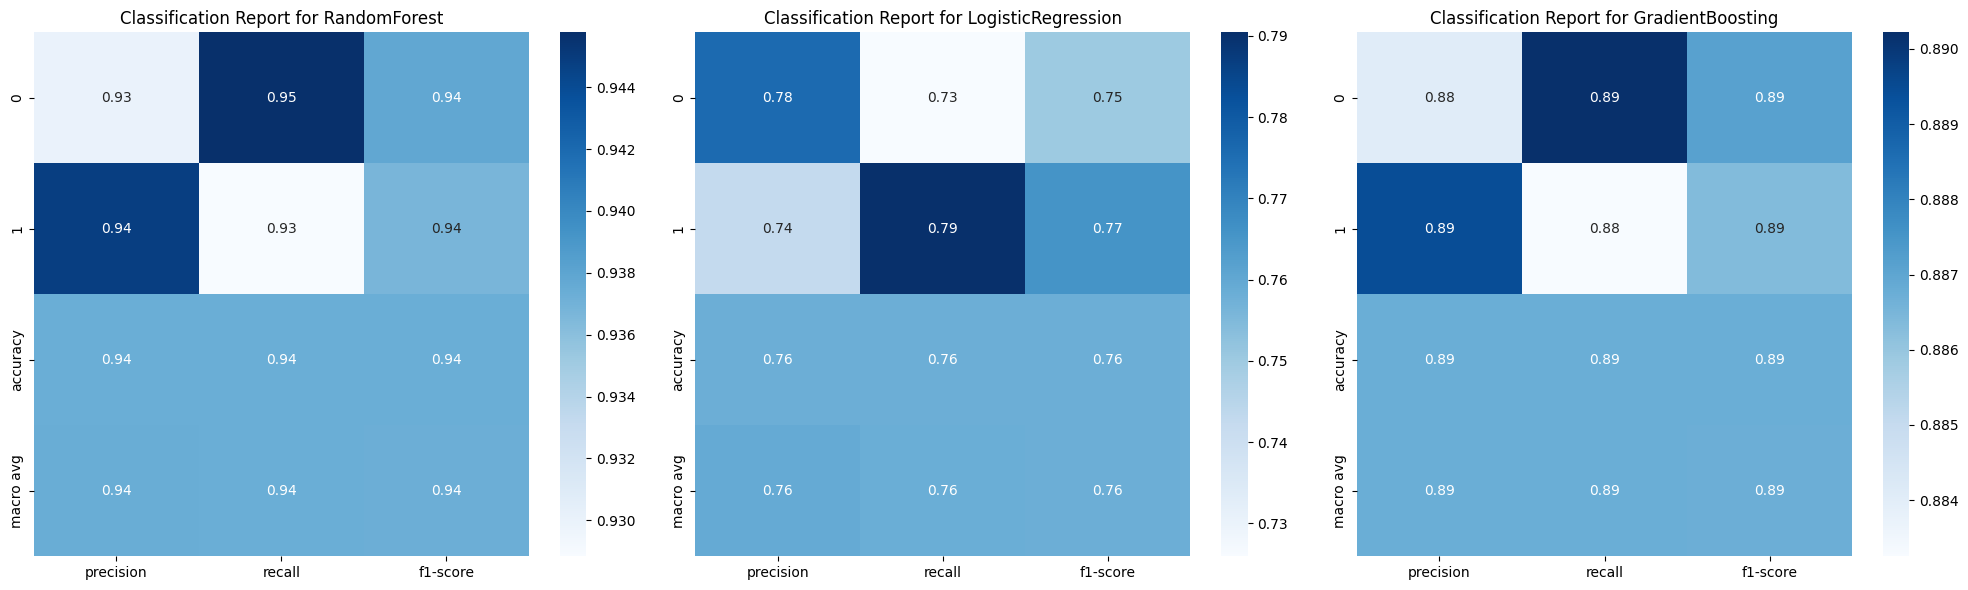

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (model_name, report) in enumerate(reports.items()):
    report_df = pd.DataFrame(report).transpose()
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt='.2f', ax=axes[i])
    axes[i].set_title(f'Classification Report for {model_name}')

plt.tight_layout()
plt.show()


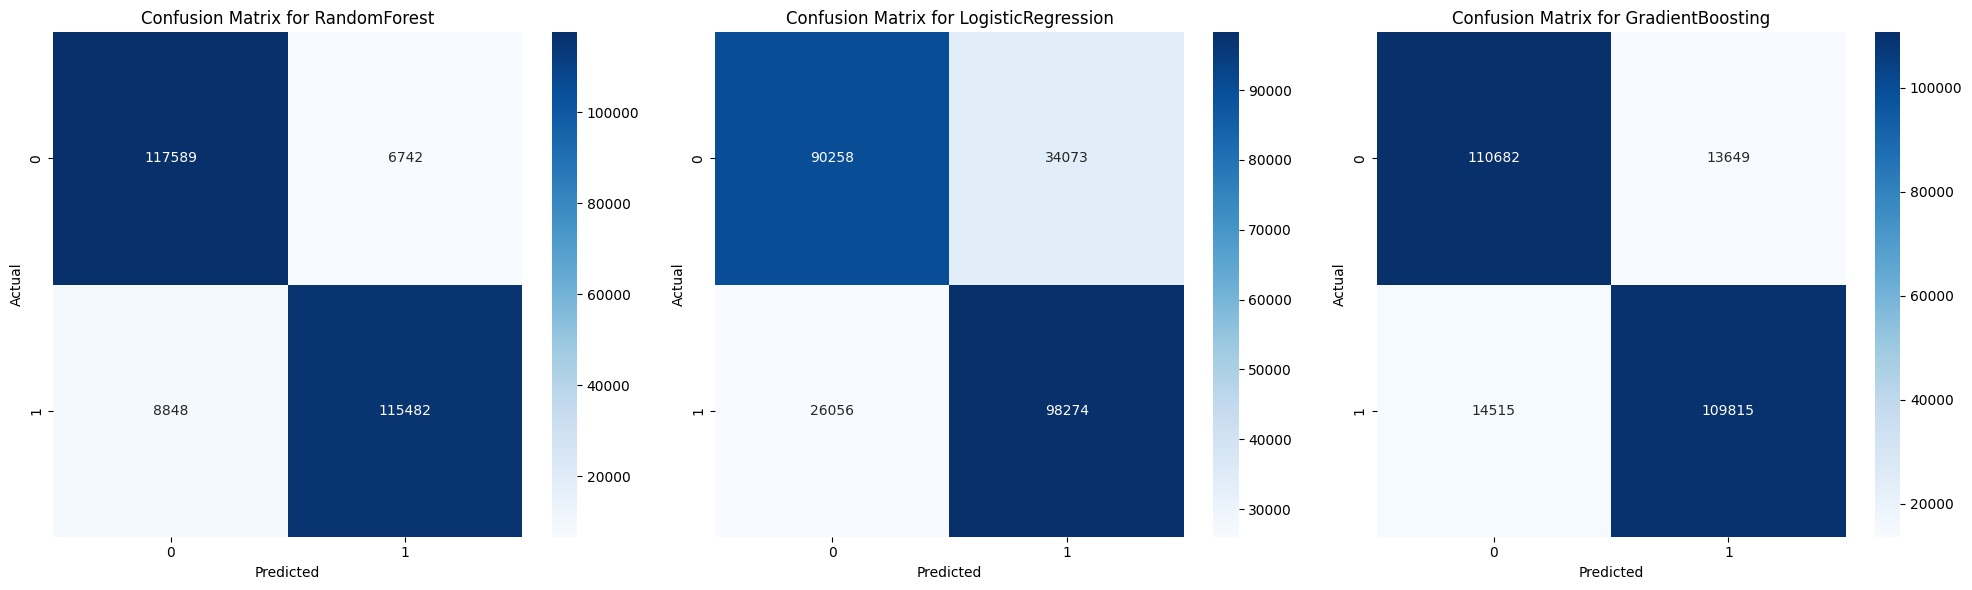

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (model_name, matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()
